In [1]:
from mpl_toolkits.mplot3d import Axes3D
import math
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets as ds
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import Lasso

In [2]:
def plot_decision_boundary(X, y, model, xmin=-0.1,
        xmax=1.1, ymin=-0.1, ymax=1.1):
    fig = plt.figure(figsize=(6,6))
    x1, x2 = np.meshgrid(np.linspace(xmin, xmax, 200),
        np.linspace(ymin, ymax, 200))
    ypred = model.predict_proba(np.c_[x1.ravel(), x2.ravel()])[:,0]
    ypred = ypred.reshape(x1.shape)
    extent = xmin, xmax, ymin, ymax
    plt.imshow(ypred, cmap=cm.bwr, alpha=.9, interpolation='bilinear',
        extent = extent, origin='lower')
    plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=cm.bwr)
    plt.show()

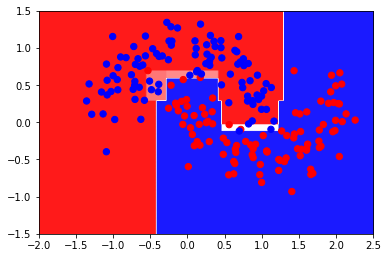

In [9]:
from sklearn.tree import DecisionTreeClassifier

np.random.seed(0)
X_train, y_train = ds.make_moons(200, noise=0.20)
clf = DecisionTreeClassifier(max_depth=10,
    min_samples_leaf=4)
clf = clf.fit(X_train, y_train)
plot_decision_boundary(X_train, y_train,clf, xmin=-2.0, xmax=2.5,
    ymin=-1.5, ymax=1.5)

In [13]:
from sklearn.tree import export_graphviz
from graphviz.files import Source
export_graphviz(clf, out_file='regression_tree_scikit.dot')
dot = open('regression_tree_scikit.dot').read()
dot = dot.replace('node [shape=box] ;',
    'node [shape=box] ;\ngraph [size="10.3,10.3!"];')
dot = Source(dot)
dot

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH